# MSE Comparison of MLE and Bayes Estimators

## Introduction

**Suppose:**

- $p$: probability of a coin producing head
- $X_i \sim$ i.i.d. $Bernoulli(p), i = 1,...,N$
- $Y = \sum_{i=1}^N X_i$: number of heads

**Estimators of interest:**

- **Maximum Likelihood Estimator (MLE)** of $p$:

$$
\hat p_M = \frac{Y}{N}
$$

Note that we can obtain this estimator by the **Method of Moment,** due to $E(X_i) = p$. 

- **Bayes Estimator** of $p$ with prior $Beta(1, 1)$: 

$$
\hat p_B = \frac{Y + 1}{N + 2}
$$

**Mean Squared Error (MSE):** A useful measure to evaluate finite-sample property of point estimator.

$$
E_p (\hat p - p)^2
$$

- MSE of $\hat p_M$: Since $E_p(\hat p_M) = p$,

$$
E_p (\hat p_M - p)^2 = Var_p (\hat p_M) = Var_p(\tfrac{Y}{N}) = \tfrac{1}{N} p(1 - p)
$$

- MSE of $\hat p_B$:

$$
E_p (\hat p_B - p)^2 = E_p (\hat p_B - E(\hat p_B) + E(\hat p_B) - p)^2 \\
= Var_p(\hat p_B) + (Bias_p (\hat p_B))^2 \\
= \tfrac{1}{(N + 2)^2} (Np(1 - p) + (1 - 2p)^2)
$$

We can observe that MSE is function of total sample size $N$ and unknown probability $p$.

## Comparison of MLE & Bayes Estimators

The following scripts are used for plotting MSE comparison for MLE and Bayes estimators.

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import itertools

import numpy as np
import scipy as sp
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
def get_prob_seq():
    """Generate a sequence of numbers in [0, 1] as probabilities."""
    p_ar = np.arange(0, 1, 0.001)
    return p_ar

In [3]:
def get_mse_mle(n, p_ar):
    """Calculate MSE of MLE for a sample size n and probabilities.
        
    Args:
      n: A integer. Sample size.
      p_ar: A NumPy array. A sequence of probabilities.
    
    Returns:
      mse_m_ar: A NumPy array. A sequence of MSE for probabilities.
    """
    mse_m_ar = 1 / n * p_ar * (1 - p_ar)
    return mse_m_ar

In [4]:
def get_mse_bayes(n, p_ar):
    """Calculate MSE of Bayes estimator for a sample size n and probabilities.
        
    Args:
      n: A integer. Sample size.
      p_ar: A NumPy array. A sequence of probabilities.
    
    Returns:
      mse_b: A NumPy array. A sequence of MSE for probabilities.
    """
    mse_b_ar = (1 / ((n + 2) ** 2) * (n * p_ar * (1 - p_ar) + ((1 - 2 * p_ar) ** 2)))
    return mse_b_ar

In [5]:
def plot_twolines(x, y1, y2, title='Line Plot', xlab='xlab', ylab='lab', 
                  legend=['y1_label', 'y2_label'], 
                  linestyle1='-', linestyle2='--', lw1=2, lw2=3,
                  xlim=None, ylim=None, figsize=(5, 5)):
    """Plot 2-line Plot.
    
    Args:
      x: A NumPy array, x vector.
      y1: A NumPy array, y1 vector.
      y2: A NumPy array, y2 vector. 
      title: A string, title.
      xlab: A string, x-axis label.
      ylab: A string, y-axis label.
      linestyle1: A string. Line style for line 1. Default to '-'.
      linestyle2: A string. Line style for line 2. Default to '--'.
      lw1: A scalar, line 1 width. Defalt to 1.
      lw2: A scalar, line 2 width. Default to 1.
      xlim: A list with [x_lower, x_upper]. Default to None.
      ylim: A list with [y_lower, y_upper]. Default to None.
      figsize: A tuple, figure size. Default: (5, 5).
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import matplotlib
    matplotlib.style.use('ggplot')
    %matplotlib inline

    plt.figure()
    fig, ax = plt.subplots(figsize=figsize)
    plt.plot(x, y1, color='b', linestyle=linestyle1, lw=lw1)
    plt.plot(x, y2, color='r', linestyle=linestyle2, lw=lw2)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.legend(legend, loc='lower right')
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    plt.show()

In [6]:
def plot_mse_of_mle_and_bayes(n):
    """Plot MSE comparison of MLE and Bayes estimators.
    
    Args:
      n: A integer. Sample size.
    """
    p_ar = get_prob_seq()
    mse_m_ar = get_mse_mle(n, p_ar)
    mse_b_ar = get_mse_bayes(n, p_ar)
    
    title = 'Comparison of MSE and Bayes with n = {}'.format(n)
    plot_twolines(
        p_ar, mse_m_ar, mse_b_ar, title=title, 
        xlab='probabilities', ylab='MSE', 
        legend=['MLE', 'Bayes'], figsize=(7.5, 7.5))

**For "small" sample $n = 5$:**

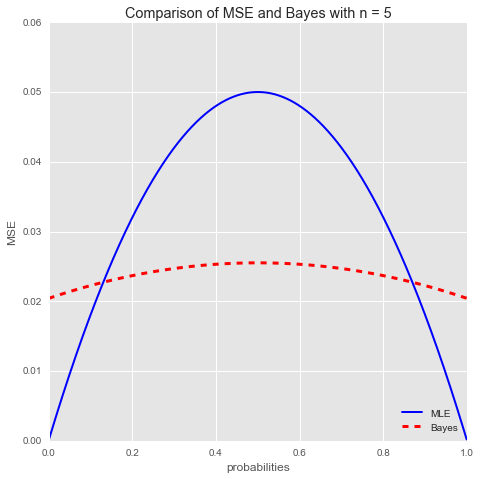

In [7]:
plot_mse_of_mle_and_bayes(5)

**For "large" sample $n = 5000$**

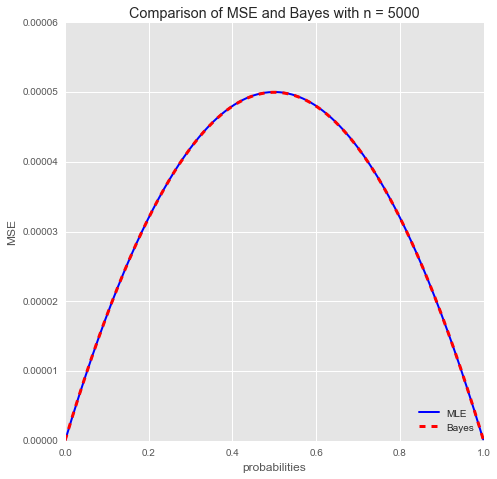

In [8]:
plot_mse_of_mle_and_bayes(5000)

In [1]:
# TODO: Derive Bayes Estimator which is independent of the prior parameters.

## Discussions

- For "small" sample size, Bayes estimator is better than the MLE generally, except when the unknown probability is highly likely close to 0 or 1.
- For "large" sample size, these two estimators have almost the same MSE. 